# WS Email and Text June and May 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [2]:
email=pd.read_excel('mailchimp.xlsx')
text=pd.read_excel('attentive.xlsx')

In [3]:
text['DATE']=pd.to_datetime(text['DATE'])
text['CTR (%)']=text['CTR (%)']*100
text['Message Title']=text['Message Title'].str.lower()
text.columns

Index(['DATE', 'Message Title', 'Has Media', 'DELIVERED', 'CLICKS', 'CTR (%)',
       'CONVERSIONS', 'CVR (%)', 'Revenue ($)', 'UNSUBSCRIBES',
       'Opt OUT Rate (%)'],
      dtype='object')

In [4]:
text=text[text['Message Title'].str.contains('ws')]
text.head()

,DATE,Message Title,Has Media,DELIVERED,CLICKS,CTR (%),CONVERSIONS,CVR (%),Revenue ($),UNSUBSCRIBES,Opt OUT Rate (%)
0,2021-05-04,ws auction - ending - 5.4.21,NO,173,3,1.7341,1,0.333333,160.0,0,0.000000
1,2021-05-05,ws stock bags and accessories 5.5.2021,NO,173,4,2.3121,0,0.000000,0.0,1,0.005780
2,2021-05-10,ws auction - ending - 5.10.21,NO,172,1,0.5813,0,0.000000,0.0,1,0.005813
5,2021-05-17,ws auction - mon ending - 5.17.21,NO,171,2,1.1695,0,0.000000,0.0,1,0.005847
7,2021-05-21,ws auction - new arrivals - 5.14.21,NO,170,2,1.1764,1,0.500000,195.0,0,0.000000


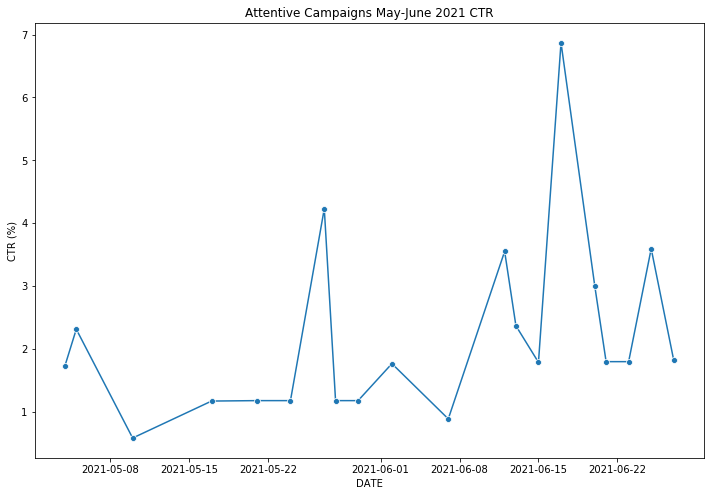

In [5]:
plt.figure(figsize=(12,8))
sns.lineplot(x='DATE', y='CTR (%)', data=text, ci=None, marker='o')
plt.title('Attentive Campaigns May-June 2021 CTR')
plt.show()

In [6]:
text[(text['DATE']!=datetime.datetime(2021,6,17))&(text['DATE']!=datetime.datetime(2021,5,27))].groupby(text['DATE'].dt.month)['CTR (%)'].mean()

DATE
5    1.312825
6    2.112427
Name: CTR (%), dtype: float64

In [7]:
text

,DATE,Message Title,Has Media,DELIVERED,CLICKS,CTR (%),CONVERSIONS,CVR (%),Revenue ($),UNSUBSCRIBES,Opt OUT Rate (%)
0,2021-05-04,ws auction - ending - 5.4.21,NO,173,3,1.7341,1,0.333333,160.0,0,0.000000
1,2021-05-05,ws stock bags and accessories 5.5.2021,NO,173,4,2.3121,0,0.000000,0.0,1,0.005780
2,2021-05-10,ws auction - ending - 5.10.21,NO,172,1,0.5813,0,0.000000,0.0,1,0.005813
5,2021-05-17,ws auction - mon ending - 5.17.21,NO,171,2,1.1695,0,0.000000,0.0,1,0.005847
7,2021-05-21,ws auction - new arrivals - 5.14.21,NO,170,2,1.1764,1,0.500000,195.0,0,0.000000
9,2021-05-24,ws auction - mon ending - 5.24.21,NO,170,2,1.1764,0,0.000000,0.0,0,0.000000
11,2021-05-27,ws stock - new arrivals - 5.27.21,NO,7447,315,4.2298,1,0.003174,630.0,39,0.005237
13,2021-05-28,ws auction - new arrivals + essentials - 5.28.21,NO,170,2,1.1764,0,0.000000,0.0,0,0.000000
14,2021-05-30,ws auction - sun ending - 5.30.21,NO,170,2,1.1764,0,0.000000,0.0,0,0.000000
15,2021-06-02,ws stock - wed new arrivals - 6.2.21,NO,170,3,1.7647,1,0.333333,850.0,0,0.000000


In [8]:
text.loc[text['Message Title'].str.contains('ending'),'type']='ending'
text.loc[text['Message Title'].str.contains('arrivals'),'type']='new arrivals'
text.loc[text['Message Title'].str.contains('bags'),'type']='other'

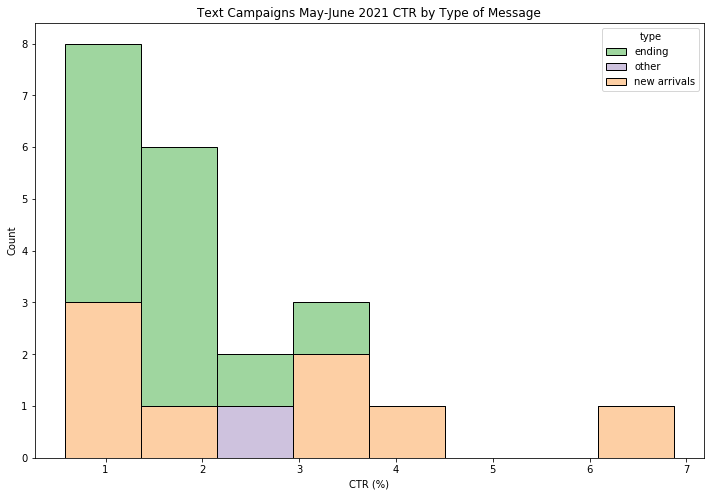

In [9]:
plt.figure(figsize=(12,8))
sns.histplot(x='CTR (%)', hue='type', data=text, multiple='stack', palette='Accent')
plt.title('Text Campaigns May-June 2021 CTR by Type of Message')
plt.show()

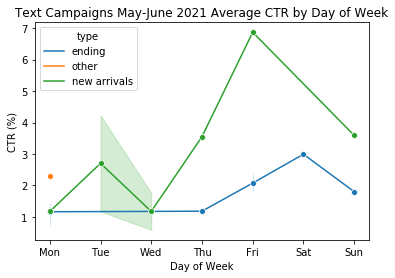

In [57]:
ax=sns.lineplot(x=np.sort(text['DATE'].dt.dayofweek),
             y=text['CTR (%)'],
            hue=text['type'], marker='o')
ax.set_xticklabels(['0','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Text Campaigns May-June 2021 Average CTR by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('CTR (%)')
plt.show()

In [59]:
text['day']=text['DATE'].dt.dayofweek

In [61]:
text[text['type']=='ending'].groupby('day')['CTR (%)'].mean()

day
0    1.181400
1    1.759900
2    1.796400
6    2.088825
Name: CTR (%), dtype: float64

In [10]:
text.groupby('type')['CTR (%)'].mean()

type
ending          1.631542
new arrivals    2.868600
other           2.312100
Name: CTR (%), dtype: float64

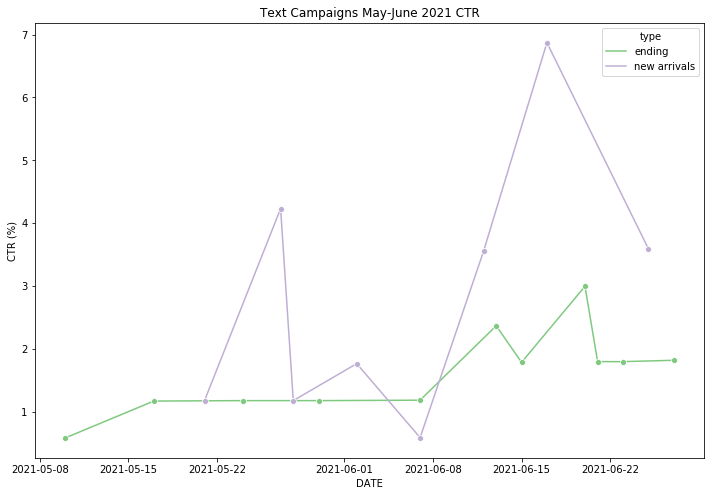

In [11]:
plt.figure(figsize=(12,8))
sns.lineplot(x=text['DATE'], y='CTR (%)',
             hue='type', data=text[text['DATE']>datetime.datetime(2021,5,5)],ci=None,
             marker='o', palette='Accent')
plt.title('Text Campaigns May-June 2021 CTR')
plt.xlabel('DATE')
plt.ylabel('CTR (%)')
plt.show()

In [12]:
email.columns

Index(['Campaign Name', 'NO', 'Campaign Send Time', 'Sends', 'Opens',
       'Open Rate', 'Clicks', 'Click Rate', 'Unsubs', 'Unsub Rate',
       'Abuse Reports', 'Abuse Rate', 'Bounces', 'Bounce Rate'],
      dtype='object')

In [13]:
email['Campaign Send Time']=pd.to_datetime(email['Campaign Send Time'])

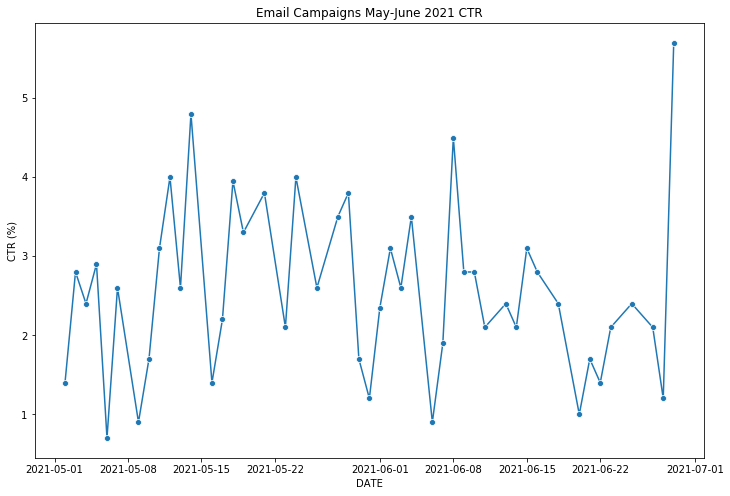

In [14]:
plt.figure(figsize=(12,8))
sns.lineplot(x=email['Campaign Send Time'].dt.date, y='Click Rate', data=email, ci=None, marker='o')
plt.title('Email Campaigns May-June 2021 CTR')
plt.xlabel('DATE')
plt.ylabel('CTR (%)')
plt.show()

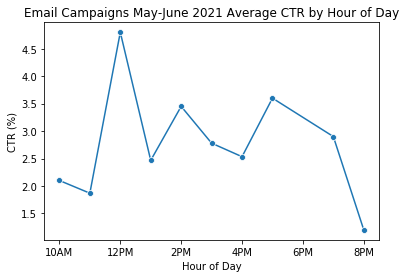

In [15]:
ax=sns.lineplot(x=np.sort(email['Campaign Send Time'].dt.hour.unique()),
             y=email.groupby(email['Campaign Send Time'].dt.hour)['Click Rate'].mean(),
            marker='o')
ax.set_xticklabels(['0','10AM', '12PM', '2PM', '4PM', '6PM', '8PM'])
plt.title('Email Campaigns May-June 2021 Average CTR by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('CTR (%)')
plt.show()

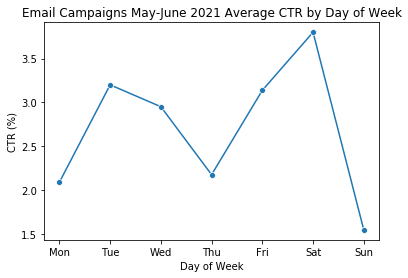

In [16]:
ax=sns.lineplot(x=np.sort(email['Campaign Send Time'].dt.dayofweek.unique()),
             y=list(email.groupby(email['Campaign Send Time'].dt.dayofweek)['Click Rate'].mean()),
            marker='o')
ax.set_xticklabels(['0','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Email Campaigns May-June 2021 Average CTR by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('CTR (%)')
plt.show()

In [17]:
email['Campaign Send Time'].dt.hour.value_counts()

11    16
15    10
17     8
16     6
13     3
14     2
10     2
20     1
19     1
12     1
Name: Campaign Send Time, dtype: int64

In [18]:
email.groupby(email['Campaign Send Time'].dt.dayofweek)['Click Rate'].mean()

Campaign Send Time
0    2.088889
1    3.200000
2    2.950000
3    2.175000
4    3.137500
5    3.800000
6    1.544444
Name: Click Rate, dtype: float64

In [19]:
email.groupby(email['Campaign Send Time'].dt.dayofweek).count()

,Campaign Name,NO,Campaign Send Time,Sends,Opens,Open Rate,Clicks,Click Rate,Unsubs,Unsub Rate,Abuse Reports,Abuse Rate,Bounces,Bounce Rate
Campaign Send Time,,,,,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9,9,9,9,9
1,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,8,8,8,8,8,8,8,8,8,8,8,8,8,8
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [20]:
email.groupby(email['Campaign Send Time'].dt.month)['Click Rate'].mean()

Campaign Send Time
5    2.684615
6    2.470833
Name: Click Rate, dtype: float64

In [21]:
email.groupby(email['Campaign Send Time'].dt.hour)['Click Rate'].count()

Campaign Send Time
10     2
11    16
12     1
13     3
14     2
15    10
16     6
17     8
19     1
20     1
Name: Click Rate, dtype: int64

In [22]:
email[email['Campaign Send Time'].dt.hour==0]

,Campaign Name,NO,Campaign Send Time,Sends,Opens,Open Rate,Clicks,Click Rate,Unsubs,Unsub Rate,Abuse Reports,Abuse Rate,Bounces,Bounce Rate


In [23]:
email[email['Campaign Send Time'].dt.hour==0]

,Campaign Name,NO,Campaign Send Time,Sends,Opens,Open Rate,Clicks,Click Rate,Unsubs,Unsub Rate,Abuse Reports,Abuse Rate,Bounces,Bounce Rate


In [33]:
email['Campaign Name']=email['Campaign Name'].str.lower()

In [31]:
email.loc[email['Campaign Name'].str.contains('auction'),'type']='auction'
email.loc[email['Campaign Name'].str.contains('stock'),'type']='stock'
email.loc[email['Campaign Name'].str.contains('blog'),'type']='blog'

In [35]:
email['message']='none'
email.loc[email['Campaign Name'].str.contains('arrival'), 'message']='arrival'
email.loc[email['Campaign Name'].str.contains('ending'), 'message']='ending'

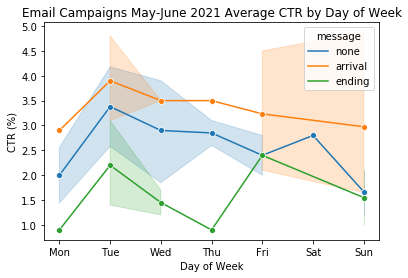

In [43]:
ax=sns.lineplot(x=np.sort(email['Campaign Send Time'].dt.dayofweek),
             y=email['Click Rate'],
            hue=email['message'], marker='o')
ax.set_xticklabels(['0','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Email Campaigns May-June 2021 Average CTR by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('CTR (%)')
plt.show()

In [55]:
email['day']=email['Campaign Send Time'].dt.dayofweek

email[email['message']=='ending']

,Campaign Name,NO,Campaign Send Time,Sends,Opens,Open Rate,Clicks,Click Rate,Unsubs,Unsub Rate,Abuse Reports,Abuse Rate,Bounces,Bounce Rate,type,message,day
7,ws_may'21_auction_sun_5.9_ending baseline,2021-05-09 15:15:00,2021-05-09 11:15:00,422,79,18.7,4,0.9,1,0.2,0,0,0,0.0,auction,ending,6
13,ws_may'21_auction_sun_5.16_ending baseline,2021-05-16 20:00:00,2021-05-16 16:00:00,419,93,22.2,6,1.4,1,0.2,0,0,0,0.0,auction,ending,6
16,ws_may'21_auctionsou_5.18_ending baseline,2021-05-18 19:45:00,2021-05-18 15:45:00,418,100,23.9,13,3.1,0,0.0,0,0,0,0.0,auction,ending,1
19,ws_may'21_auction_sun_5.23_ending baseline,2021-05-23 14:30:00,2021-05-23 10:30:00,421,87,20.7,9,2.1,0,0.0,0,0,0,0.0,auction,ending,6
24,ws_may'21_auction_sun_5.30_endingbags baseline,2021-05-30 15:00:00,2021-05-30 11:00:00,423,79,18.7,7,1.7,0,0.0,0,0,0,0.0,auction,ending,6
26,ws_june'21_auctionsou_6.1_ending baseline,2021-06-01 15:00:00,2021-06-01 11:00:00,423,83,19.6,5,1.2,0,0.0,0,0,0,0.0,auction,ending,1
31,ws_june'21_auction_sun_6.6_ending baseline,2021-06-06 15:30:00,2021-06-06 11:30:00,423,80,18.9,4,0.9,0,0.0,0,0,0,0.0,auction,ending,6
37,ws_june'21_auction_sun_6.13_ending baseline,2021-06-13 15:15:00,2021-06-13 11:15:00,423,91,21.6,10,2.4,0,0.0,0,0,1,0.2,auction,ending,6
42,ws_june'21_auction_sun_6.20_ending baseline,2021-06-20 15:00:00,2021-06-20 11:00:00,422,92,21.9,4,1.0,0,0.0,0,0,1,0.2,auction,ending,6
47,ws_june'21_auction_sun_6.27_ending baseline,2021-06-27 15:00:00,2021-06-27 11:00:00,421,97,23.0,9,2.1,0,0.0,0,0,0,0.0,auction,ending,6


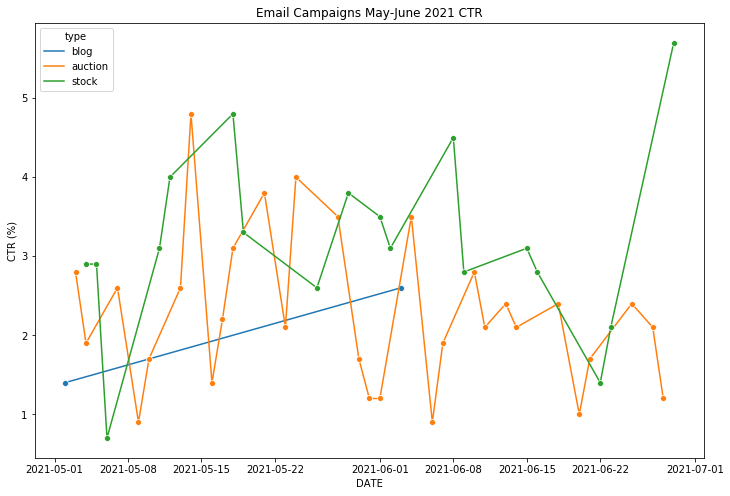

In [26]:
plt.figure(figsize=(12,8))
sns.lineplot(x=email['Campaign Send Time'].dt.date, y='Click Rate', hue='type', data=email, ci=None, marker='o')
plt.title('Email Campaigns May-June 2021 CTR')
plt.xlabel('DATE')
plt.ylabel('CTR (%)')
plt.show()

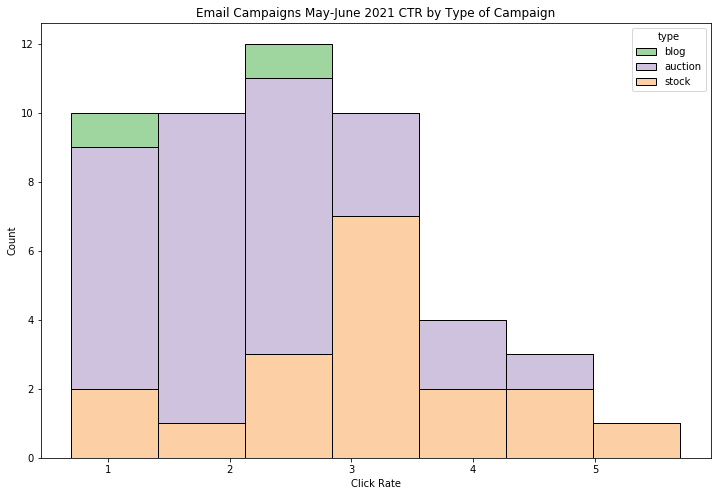

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(x='Click Rate', hue='type', data=email, multiple='stack', palette='Accent')
plt.title('Email Campaigns May-June 2021 CTR by Type of Campaign')
plt.show()

In [28]:
email.groupby('type')['Click Rate'].mean()

type
auction    2.266667
blog       2.000000
stock      3.172222
Name: Click Rate, dtype: float64

In [29]:
email

,Campaign Name,NO,Campaign Send Time,Sends,Opens,Open Rate,Clicks,Click Rate,Unsubs,Unsub Rate,Abuse Reports,Abuse Rate,Bounces,Bounce Rate,type
0,ws_may'21_blog_sun_5.2_wsblogroundup Baseline,2021-05-02 15:00:00,2021-05-02 11:00:00,423,79,18.7,6,1.4,0,0.0,0,0,0,0.0,blog
1,ws_may'21_auction_mon_5.3_LV+Accessories Baseline,2021-05-03 15:00:00,2021-05-03 11:00:00,423,90,21.3,12,2.8,0,0.0,0,0,1,0.2,auction
2,ws_may'21_auctionSOU_5.4_bestof Baseline,2021-05-04 15:00:00,2021-05-04 11:00:00,422,83,19.7,8,1.9,1,0.2,0,0,0,0.0,auction
3,ws_may'21_stock_tue_5.4_NewArrivals+Blog Baseline,2021-05-04 23:15:00,2021-05-04 19:15:00,421,88,20.9,12,2.9,0,0.0,0,0,0,0.0,stock
4,ws_may'21_stock_wed_5.5_Bags+Accessories+Blog ...,2021-05-05 18:30:00,2021-05-05 14:30:00,420,118,28.1,12,2.9,0,0.0,0,0,0,0.0,stock
5,ws_may'21_stock_thur_5.6_LV+Rare Baseline,2021-05-06 20:45:00,2021-05-06 16:45:00,420,101,24.0,3,0.7,0,0.0,0,0,0,0.0,stock
6,ws_may'21_auction_fri_5.7_EcoRing Baseline,2021-05-07 19:15:00,2021-05-07 15:15:00,422,107,25.4,11,2.6,0,0.0,0,0,0,0.0,auction
7,ws_may'21_auction_sun_5.9_Ending Baseline,2021-05-09 15:15:00,2021-05-09 11:15:00,422,79,18.7,4,0.9,1,0.2,0,0,0,0.0,auction
8,ws_may'21_auction_mon_5.10_ends Baseline,2021-05-10 15:15:00,2021-05-10 11:15:00,422,87,20.6,7,1.7,0,0.0,0,0,0,0.0,auction
9,ws_may'21_stock_tue_5.11_NewArrivals+FathersDa...,2021-05-11 21:00:00,2021-05-11 17:00:00,421,96,22.8,13,3.1,0,0.0,0,0,0,0.0,stock
